<a href="https://colab.research.google.com/github/vickkiee/dgadata/blob/main/MLF_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Foundations - **Unsupervised Learning**

First we will look at how the data for Unsupervised machine learning can look like visually

The below cell does the following

1.   Loads Required Libraries
2.   Loads and prepares the data
3. Displays our data in a dataframe



Our data for this unsupervised learning example is about the Iris flower. It gives us the information about the flower such as petal and sepal length/width.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt

iris_data=load_iris()   #loading iris dataset from sklearn.datasets

x = iris_data.data

iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names) #creating dataframe
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In the above dataframe, we can see all the dimensions for the flowers (sepal and petal sizes). Below, we have highlighted the dataframe to enforce the facct that it contains only features (X) and no target/label variable (Y).


*   Green highlight = Features
*   Red highlight = Labels (in our case there is no red)






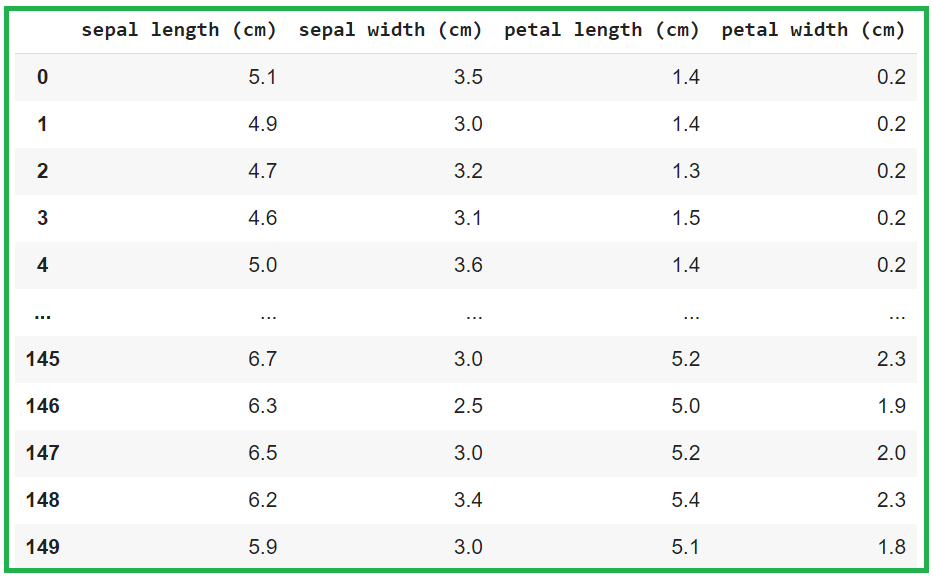

From here onwards, we will use an algorithm called **K-Means Clustering**. The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K.

Clear Goal: We are trying to identify how many groups (species) of the Iris flower exists.

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

What the above cell did:


1.   We fit our data (recall its only features (X) and no label (y))
2.   We experimented with trying to fit the data into a range of groups (1 to 15)
3. Finally we did some math to observe our experiments.

The image below will show the steps.

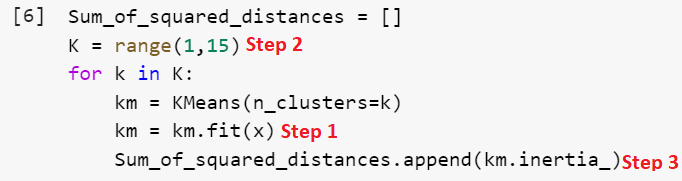



We will now observe our experiment's results to decide what is the number of groups that exist in this particular flower. We will use a method called the 'Elbow Method' to help us determine the optimal split of the flower.

#### **Elbow Method**

The elbow method tells us the optimal K (number of groups) by looking at the graph above. We need to find the point at which the shape of the graph bends like an elbow and continues onwards as the hand. For example:

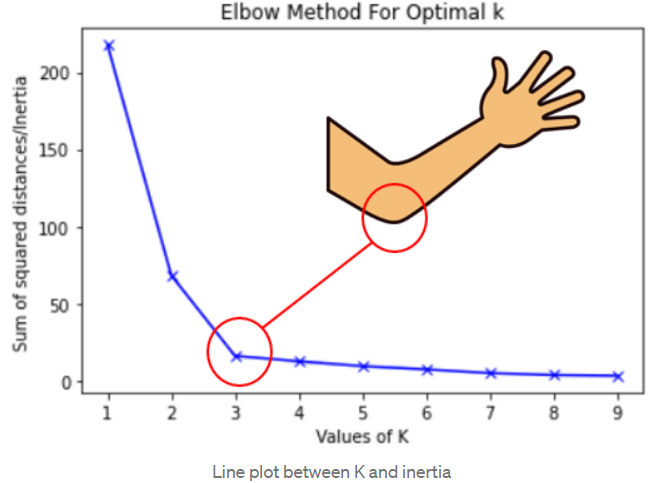

### **Our experiment's results plotted on a graph.**

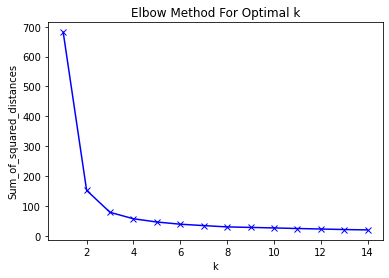

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From our own graph, we can see the elbow is at a k value of 3. Thus, we can conclude there optimal number of groups present in our data is 3. In other words, there are 3 species of the Iris flower.

We will now observe our data with 3 groups/clusters to have a better visualization of our results.

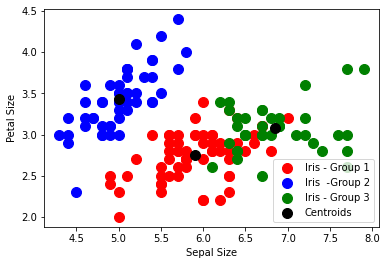

In [ ]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
#print(kmeans.cluster_centers_) #display cluster centers
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris - Group 1')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris  -Group 2')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris - Group 3')
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Sepal Size')
plt.ylabel('Petal Size')
plt.legend()
plt.show()

As you can see from above, there are 3 notable groups present in our visualization of the data so our experiment worked.

In reality, we know for a fact that there are 3 species of the Iris flower - hence proving unsupervised learning a good approach to solving problems.

**The 3 species of the Iris flower:**

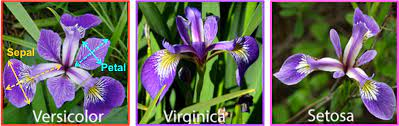